<a href="https://colab.research.google.com/github/madhuribonela/Airbnb-Bookings-Analysis-final/blob/main/Airbnb_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

<b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

<b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **What is Airbnb and how does it work?**


---



1.   A community built on sharing
Airbnb began in 2008 when two designers who had space to share hosted three travellers looking for a place to stay. Now, millions of hosts and travellers choose to create a free Airbnb account so they can list their space and book unique accommodation anywhere in the world. And Airbnb experience hosts share their passions and interests with both travellers and locals.


2.   Trusted services
Airbnb helps make sharing easy, enjoyable, and safe. We verify personal profiles and listings, maintain a smart messaging system so hosts and guests can communicate with certainty, and manage a trusted platform to collect and transfer payments.




---




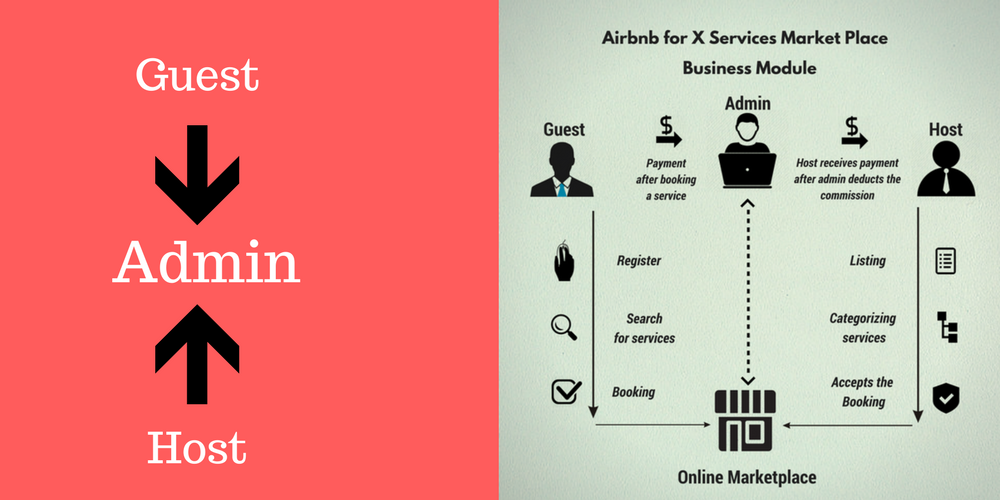

# **Lets starts our journey** ✈

**Importing require Libraries**

---



In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


**Mounting Data from drive & setting path of csv file**

---



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
project_path = '/content/drive/MyDrive/Airbnb/Airbnb NYC 2019.csv'

**Loading Data set top five rows**

---



In [5]:
df = pd.read_csv(project_path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Initial Data Exploration**

---



In [6]:
df.shape

(48895, 16)

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Attributes of each variable:**

---
id : Unique for each Propety Listing.

name : Name of the each Propety Listing.

host_id : Unique ID for host who have listed the property on Airbnb.

host_name : Name of host

neighbourhood_group : Name of Each boroughs of NYC, Manhattan, Brooklyn,Queens,Bronx, State Island.

neighbourhood : Area in each borough of NYC

latitude, longitude : Co-ordinates of each listed property

room_type : Differnt types of room available for listing , Private room,Entire home/apt,Shared room.

price : Price of listing.

minimum_nigths : Mandatory number of nights to be booked for available foe each type of property.

number_of_review : Number of reviews for each Listed property

last_review : Date on whcih last time the listing was reviewed

review_per_month : Number of reviews per month

calculated_host_listings_count : Number of listing each host owns

availablity_365 : Number of days the given listing is available for booking


In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Checking Null Values**

---



In [10]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Taking Necessary columns**

---




In [11]:
new_df=df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365',]]
new_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,Private room,79,2,430,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,Private room,79,2,118,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,Entire home/apt,150,1,160,4,188


**We can see the corelation between the variables**

---



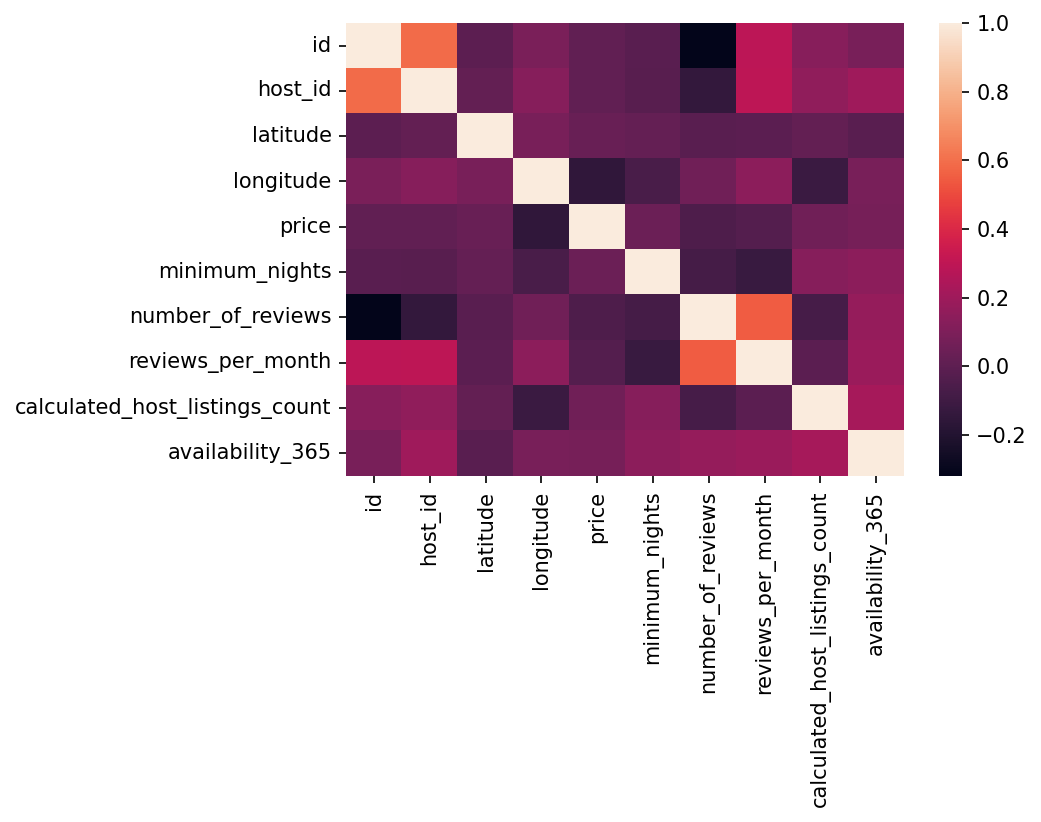

In [12]:
plt.rcParams['figure.dpi'] = 150
sns.heatmap(df.corr())

**Heatmaps we can see**
**It Looks like host_id and reviews_per_month are positively co-related
id and reviews_per_month are also co-related positively**

# **Exploratory Data Analysis (EDA)**

**1.Highest number of Airbnbs Managed by a host ID :- This graph below is a plot between host ID and the number of air bnb that are managed by them.From this graph we can find the top 10 people that owns or manages most number of airbnbs in New York city.we can see that there is a good distribution between top 10 hosts with the most listings. First host has more than 300+ listings.**

---


In [13]:
top_host=new_df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

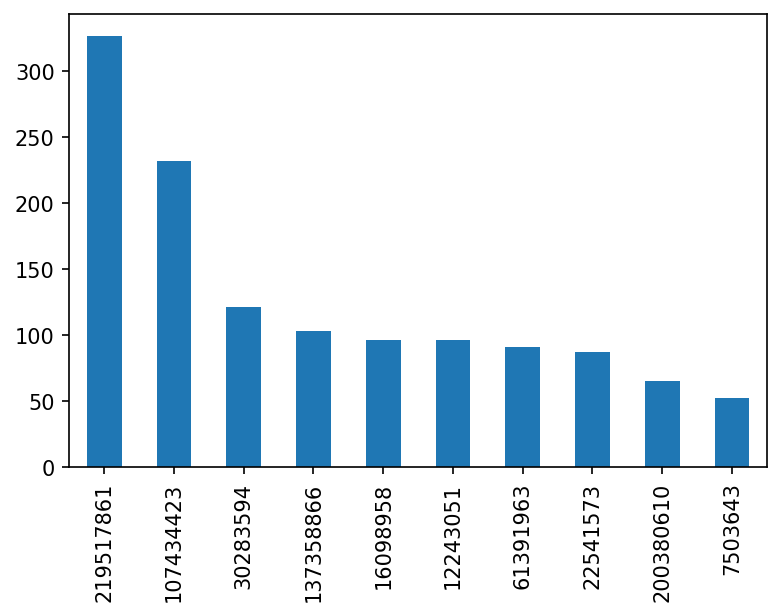

In [ ]:
new_df.host_id.value_counts().head(10).plot(kind='bar')

In [14]:
#checking the number of listings by host_name
new_df.host_name.value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

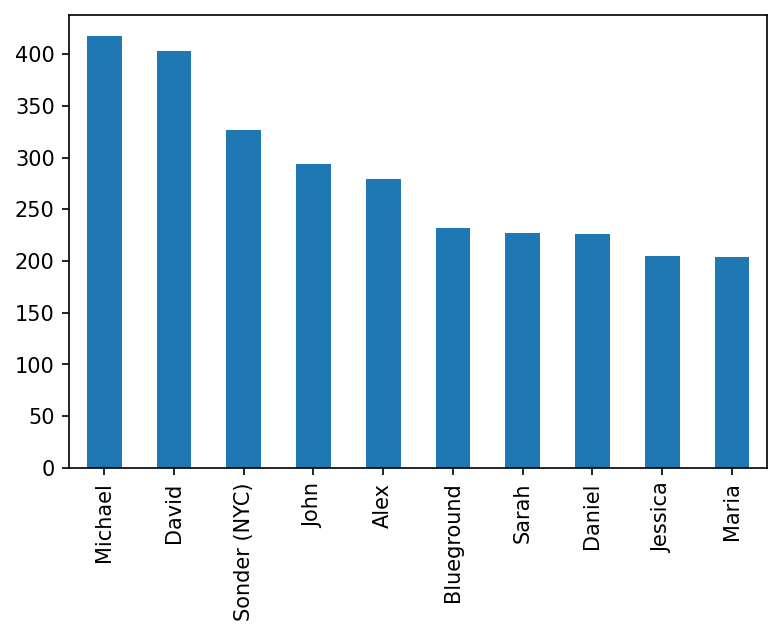

In [15]:
new_df.host_name.value_counts().head(10).plot(kind='bar')

**2. What proportion of the rentals correspond to each room type?**

---



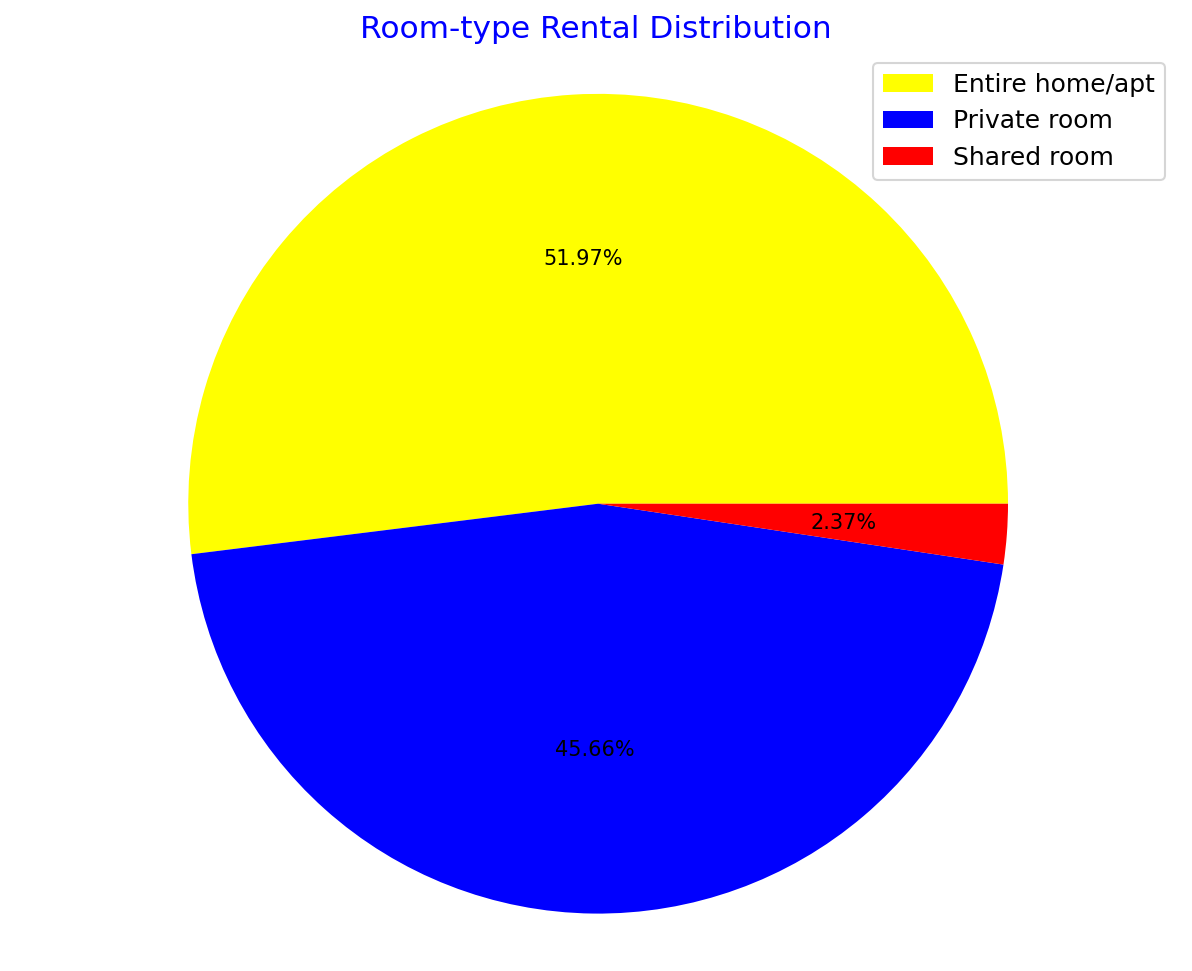

In [16]:
#Retrives proportion of the rentals corresponding to each room type 
room_type = df.groupby('room_type')['latitude'].count().reset_index()
room_type.rename(columns={'latitude':'n_rooms'},inplace=True)
plt.figure(figsize=(10,8))
plt.pie(room_type['n_rooms'],autopct='%1.2f%%', colors=['yellow', 'blue','red'])
plt.axis('equal')
plt.legend(labels=room_type['room_type'],loc='best',fontsize='12')
plt.title('Room-type Rental Distribution', fontsize='15',color='b')
plt.show()
plt.close()

**3. What’s the price distribution and what’s the range of fair prices available?**

---



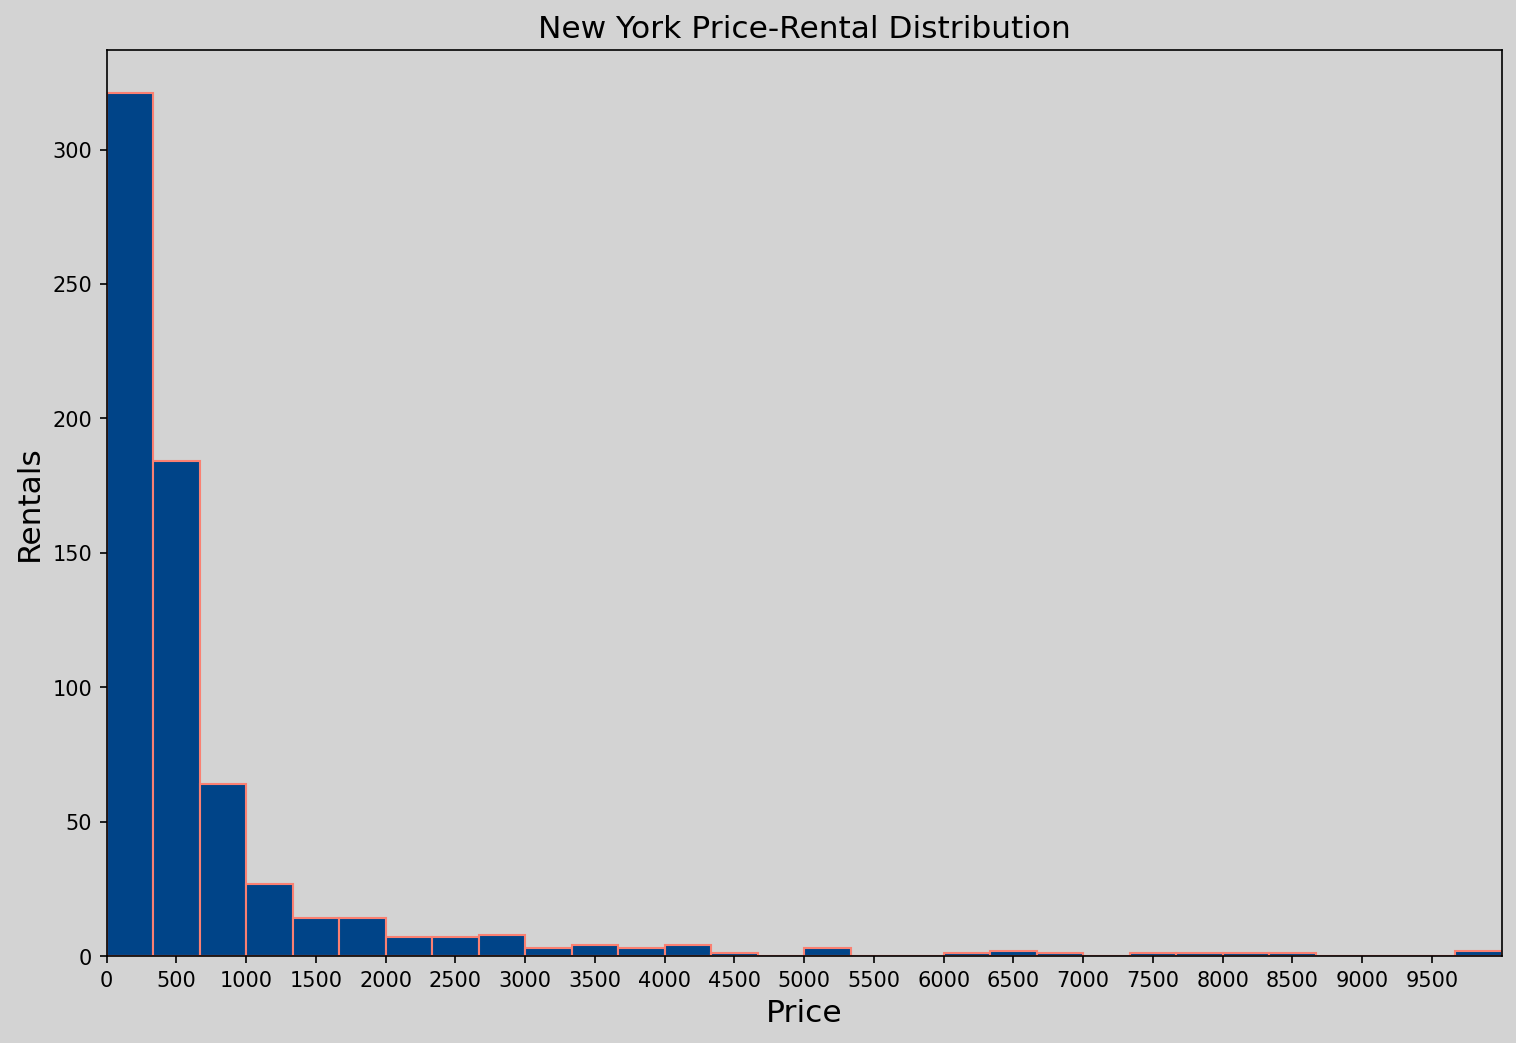

In [17]:
price = df.loc[:,['neighbourhood','price']].set_index('neighbourhood')
price_stats = df['price'].describe().reset_index()
price_counts = price.price.value_counts().reset_index()
price_counts.rename(columns={'index':'price','price':'count'},inplace=True)
fig2,ax = plt.subplots(figsize=(12,8))
fig2.patch.set_facecolor('lightgray')
ax.set_facecolor('lightgray')
plt.hist(price_counts['price'],bins=30,color='#004488',edgecolor='salmon')
ax.set_xticks(range(0,10000,500))

plt.xlabel('Price',fontsize='15')
plt.ylabel('Rentals', fontsize='15')
plt.xlim((-0.5,10000))
plt.title('New York Price-Rental Distribution',fontsize='15')
plt.show()

##Price distribution is focused around the $ 300–400 prices with few observations that present higher prices.

**4.Which are the most popular locations to rent a lodge?**

---



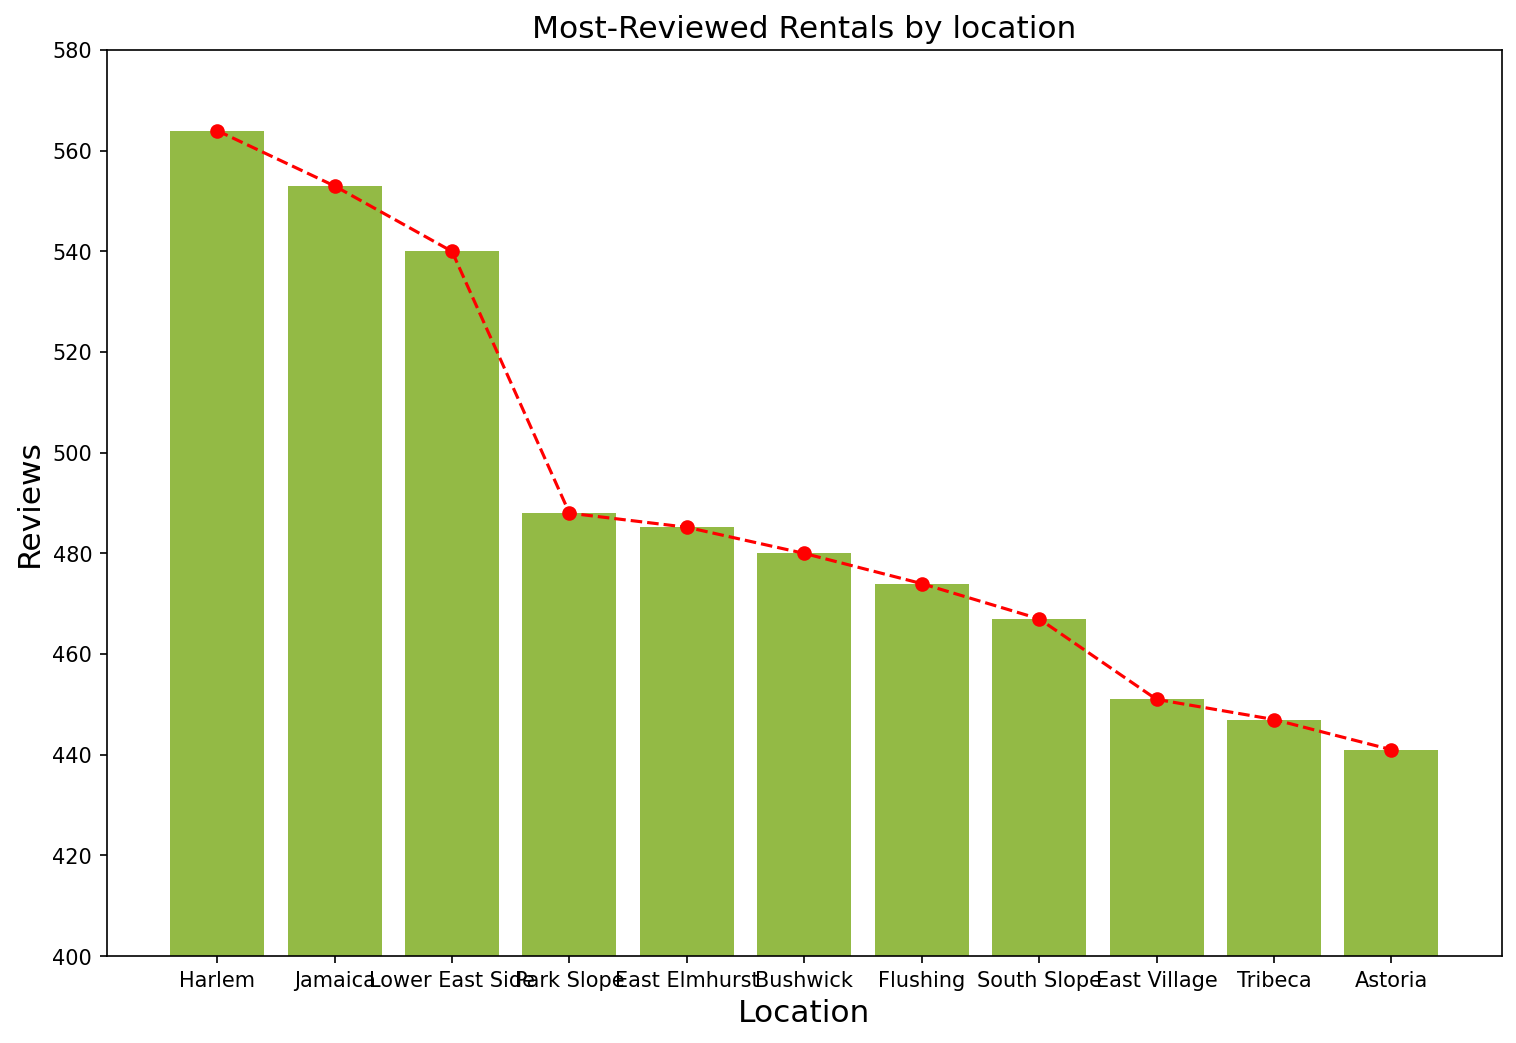

In [18]:
review = df.sort_values('number_of_reviews',ascending=False)
top_reviewed = review.loc[:,['neighbourhood','number_of_reviews']][:20]
top_reviewed = top_reviewed.groupby('neighbourhood').mean().sort_values('number_of_reviews',ascending=False).reset_index()
fig4,ax3 = plt.subplots(figsize=(12,8))
sns.barplot(x=top_reviewed['neighbourhood'],y=top_reviewed['number_of_reviews'].values,color='yellowgreen',ax=ax3)
plt.plot(top_reviewed['number_of_reviews'], marker='o', color='red',linestyle='--')
plt.ylabel('Reviews', fontsize='15')
plt.xlabel('Location',fontsize='15')
plt.ylim((400,580))
plt.title('Most-Reviewed Rentals by location',fontsize='15')
plt.show()
sns.set()

##Based on Airbnb users reviews, we can deduce which rentals were most visited or most popular (which does not mean that they’re the best, but to simplify the case, 
##let’s consider that if they were visited more times, maybe it’s because previous visitors left good reviews).

##In the image above, we see that most reviewed locations involve less-demanded boroughs, where most popular rentals tend to average 550 reviews from users.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


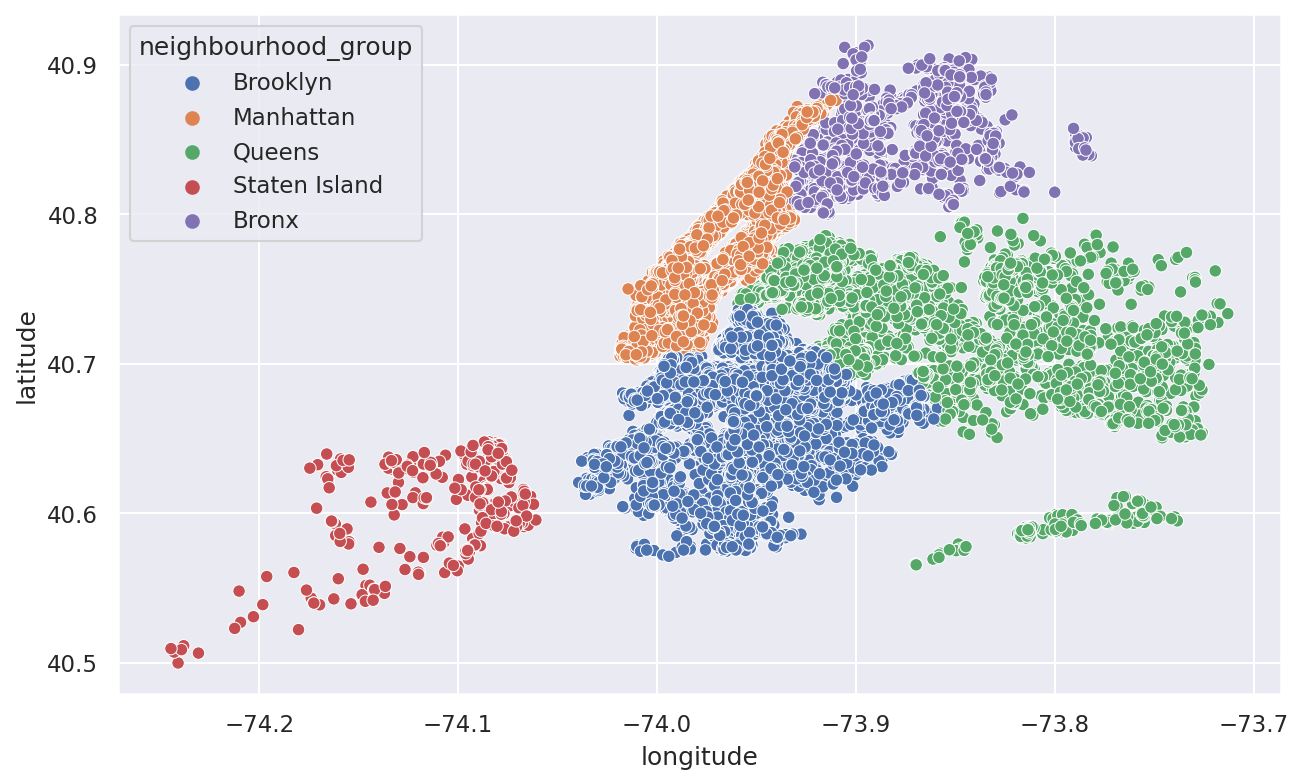

In [19]:
#Location of neighbourhood_group with maximum listings of host or rentals 
plt.figure(figsize=(10,6), dpi = 150)
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group
)
plt.ioff()

**Queens has the highest listing. It’s a tourist attraction hence the number of listings could be higher.**

In [20]:
# Creating dataFrame for the unique number of hosts in each borough
Number_host =df[['host_id','neighbourhood_group']].drop_duplicates().groupby(['neighbourhood_group']).count().sort_values('host_id',ascending = False).reset_index()
Number_host

,neighbourhood_group,host_id
0,Manhattan,16578
1,Brooklyn,15966
2,Queens,3983
3,Bronx,789
4,Staten Island,256


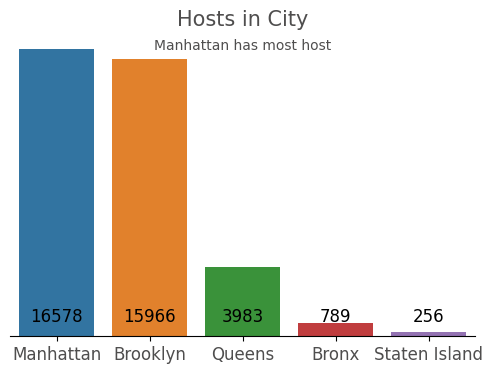

In [21]:
sns.reset_orig()
plt.rcParams['figure.dpi'] = 100
sns.barplot(data=Number_host, x="neighbourhood_group", y="host_id")
plt.xlabel('')
plt.ylabel('')
plt.title('Hosts in City', size=15, color='#4f4e4e')
plt.xticks(size=12, color='#4f4e4e')
plt.yticks([], [])
plt.text(x=2, y=16500, s='Manhattan has most host', color='#4f4e4e', fontsize=10, horizontalalignment='center')
plt.text(x=0, y=800, s=Number_host.loc[0,'host_id'], color='black', fontsize=12, horizontalalignment='center')
plt.text(x=1, y=800, s=Number_host.loc[1,'host_id'], color='black', fontsize=12, horizontalalignment='center')
plt.text(x=2, y=800, s=Number_host.loc[2,'host_id'], color='black', fontsize=12, horizontalalignment='center')
plt.text(x=3, y=800, s=Number_host.loc[3,'host_id'], color='black', fontsize=12, horizontalalignment='center')
plt.text(x=4, y=800, s=Number_host.loc[4,'host_id'], color='black', fontsize=12, horizontalalignment='center')
sns.despine(left=True);

1.Manhattan has the most number of customers or hosts followed by Brooklyn. 

2.Manhattan has highest number of listings in city.

3.Staten island has less rentals in city.

# **Conclusion**

---



 1.The customers who determine upon to proceed to be in complete domestic or rental they are going to be bit longer in that precise neighbourhood solely . 

2.The customers who determine on to continue to be in personal room they would possibly no longer proceed to be as lengthy as in contrast to domestic or apartment.

3.Most of the customers decide upon to pay much less fee ie.,sensible fee or resonable fee for staying like resort or condo so,most of the rooms with less price range got listings.

4.if there are higher range of popularity for a nearby crew that place of particular neighbourhood is a vacationer vicinity.

5.if more range in number of reviews then popularity for that particular place is more which is further increases which in turn increases profits.

6.more number of listings are from entire home/apartment and the next with maximum host listings is private room because family people prefer to stay in entire home /apartment or else private rooms at outdoor visiting locations.

7.In terms of descending order to ascending order the number of
  listings from highest to lowest range the one with highest listing
  from highest to lowest is 1.Michael 2.David 3.Sonder 4.John 5.Alex 
  6.Blueground 7.Sarah 8.Daniel 9.Jessica 10.Marina.

8.From pie chart configuration the proportion of the rentals correspond 
  to each room type Entirehome/apartment with 51.97% of rental
  distribution which is highest and the next  second highest of private
  room with 45.66% and the lowest of shared room with 2.37%.

9.less price range of rentals got most number of listings.

10.The location of place named Queens got highest rentals followed by other locations like Brooklyn,Bronx,Manhattan,Statenisland.

11.The increase in range of reviews have even increased the popularity of place which in turn increased the host listings or rentals.

12.The city with maximum number of hosts are 1.Manhattan 2.Brooklyn 3.Queens 4.Bronx 5.Staten island.